In [ ]:
# SETEAMOS ANOTACIONES.

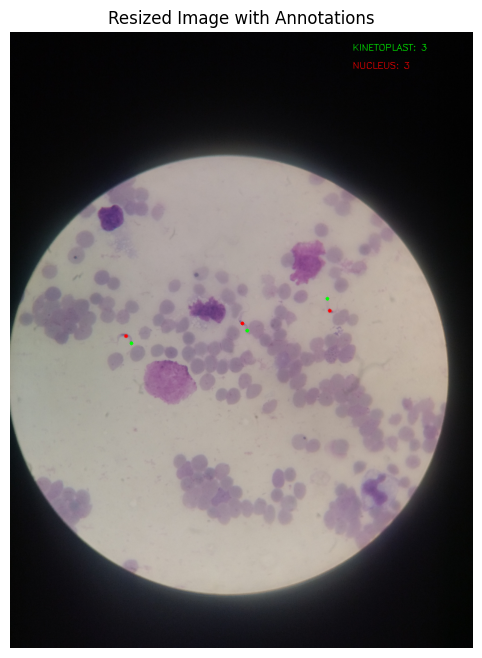

In [8]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

# File paths
csv_path = "./ft_orig/supp_data01.csv"
image_path = './img/field0001.jpg'

# Read CSV
df = pd.read_csv(csv_path)

# Check required columns
required_cols = ['filename', 'new_x', 'new_y', 'structure']
if not all(col in df.columns for col in required_cols):
    print("CSV is missing required columns.")
    exit()

# Filter DataFrame for 'field0001.jpg'
df_image = df[df['filename'].str.strip() == 'field0001.jpg']

# Load image
image = cv2.imread(image_path)
if image is None:
    print("Image not found.")
    exit()

# Get original dimensions
original_h, original_w = image.shape[:2]

# Define target size
target_size = (768, 1024)  # width, height

# Resize the image
resized_image = cv2.resize(image, target_size)

# Define a color map for specific structures
color_map = {
    'NUCLEUS': (0, 0, 255),      # Red
    'KINETOPLAST': (0, 255, 0),  # Green
}

# Default color for other structures
default_color = (255, 0, 0)  # Blue

# Count the occurrences of each structure
structure_counts = defaultdict(int)
for _, row in df_image.iterrows():
    structure_counts[row['structure']] += 1

# Draw annotations on the resized image
if not df_image.empty:
    # Position for the labels in the top-right corner
    label_x = target_size[0] - 200  # X position (adjust as needed)
    label_y = 30  # Initial Y position (adjust as needed)
    
    # Draw the structure counts in the top-right corner
    for structure, count in structure_counts.items():
        # Get the color for the current structure
        color = color_map.get(structure, default_color)  # Use default color if structure not in map
        
        # Draw the label with the count
        label = f"{structure}: {count}"
        cv2.putText(resized_image, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
        
        # Move the Y position down for the next label
        label_y += 30  # Adjust spacing between labels
    
    # Draw the points on the image
    for index, row in df_image.iterrows():
        x = int(row['new_x'])
        y = int(row['new_y'])
        label = row['structure']
        
        # Get the color for the current structure
        color = color_map.get(label, default_color)  # Use default color if structure not in map
        
        # Draw the circle (point) on the image
        cv2.circle(resized_image, (x, y), 3, color, -1)
else:
    print("No annotations found for the image.")

# Convert the image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Create a larger figure
plt.figure(figsize=(12, 8))  # Width: 12 inches, Height: 8 inches

# Display the annotated image
plt.imshow(image_rgb)
plt.title('Resized Image with Annotations')
plt.axis('off')
plt.show()

In [ ]:
# HACEMOS UNA ROTACION 45 GRADOS DE LA IMAGEN

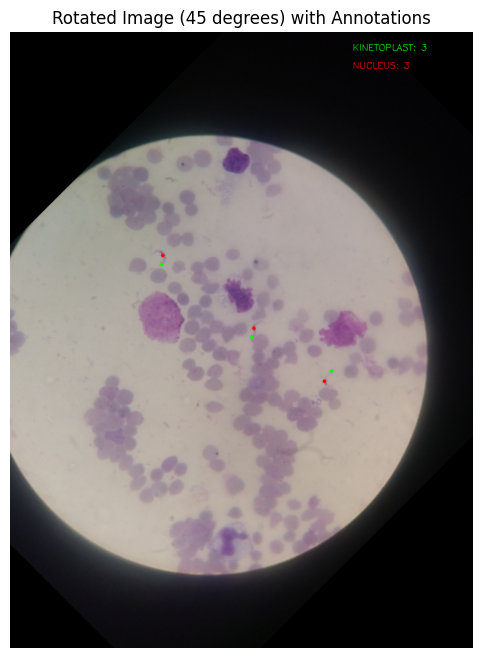

In [9]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# File paths
csv_path = "./ft_orig/supp_data01.csv"
image_path = './img/field0001.jpg'

# Read CSV
df = pd.read_csv(csv_path)

# Check required columns
required_cols = ['filename', 'new_x', 'new_y', 'structure']
if not all(col in df.columns for col in required_cols):
    print("CSV is missing required columns.")
    exit()

# Filter DataFrame for 'field0001.jpg'
df_image = df[df['filename'].str.strip() == 'field0001.jpg']

# Load image
image = cv2.imread(image_path)
if image is None:
    print("Image not found.")
    exit()

# Get original dimensions
original_h, original_w = image.shape[:2]

# Define target size
target_size = (768, 1024)  # width, height

# Resize the image
resized_image = cv2.resize(image, target_size)

# Define a color map for specific structures
color_map = {
    'NUCLEUS': (0, 0, 255),      # Red
    'KINETOPLAST': (0, 255, 0),  # Green
}

# Default color for other structures
default_color = (255, 0, 0)  # Blue

# Count the occurrences of each structure
structure_counts = defaultdict(int)
for _, row in df_image.iterrows():
    structure_counts[row['structure']] += 1

# Function to rotate a point around a center
def rotate_point(point, angle, center):
    angle_rad = np.deg2rad(angle)
    x, y = point
    cx, cy = center
    x_rot = cx + np.cos(angle_rad) * (x - cx) - np.sin(angle_rad) * (y - cy)
    y_rot = cy + np.sin(angle_rad) * (x - cx) + np.cos(angle_rad) * (y - cy)
    return int(x_rot), int(y_rot)

# Rotate the image and annotations by 45 degrees clockwise
angle = 45  # Rotation angle in degrees
center = (target_size[0] // 2, target_size[1] // 2)  # Center of rotation

# Get the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)

# Rotate the image
rotated_image = cv2.warpAffine(resized_image, rotation_matrix, target_size)

# Draw annotations on the rotated image
if not df_image.empty:
    # Position for the labels in the top-right corner
    label_x = target_size[0] - 200  # X position (adjust as needed)
    label_y = 30  # Initial Y position (adjust as needed)
    
    # Draw the structure counts in the top-right corner
    for structure, count in structure_counts.items():
        # Get the color for the current structure
        color = color_map.get(structure, default_color)  # Use default color if structure not in map
        
        # Draw the label with the count
        label = f"{structure}: {count}"
        cv2.putText(rotated_image, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
        
        # Move the Y position down for the next label
        label_y += 30  # Adjust spacing between labels
    
    # Draw the points on the rotated image
    for index, row in df_image.iterrows():
        x = int(row['new_x'])
        y = int(row['new_y'])
        label = row['structure']
        
        # Get the color for the current structure
        color = color_map.get(label, default_color)  # Use default color if structure not in map
        
        # Rotate the point
        rotated_x, rotated_y = rotate_point((x, y), angle, center)
        
        # Draw the circle (point) on the rotated image
        cv2.circle(rotated_image, (rotated_x, rotated_y), 3, color, -1)
else:
    print("No annotations found for the image.")

# Convert the image to RGB for displaying with matplotlib
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

# Create a larger figure
plt.figure(figsize=(12, 8))  # Width: 12 inches, Height: 8 inches

# Display the rotated image with annotations
plt.imshow(rotated_image_rgb)
plt.title(f'Rotated Image (45 degrees) with Annotations')
plt.axis('off')
plt.show()

In [ ]:
# ROTAMOS 7 ROTACIONES, MAS LA ORIGINAL TENEMOS 8 ROTACIONES DE LA IMAGEN

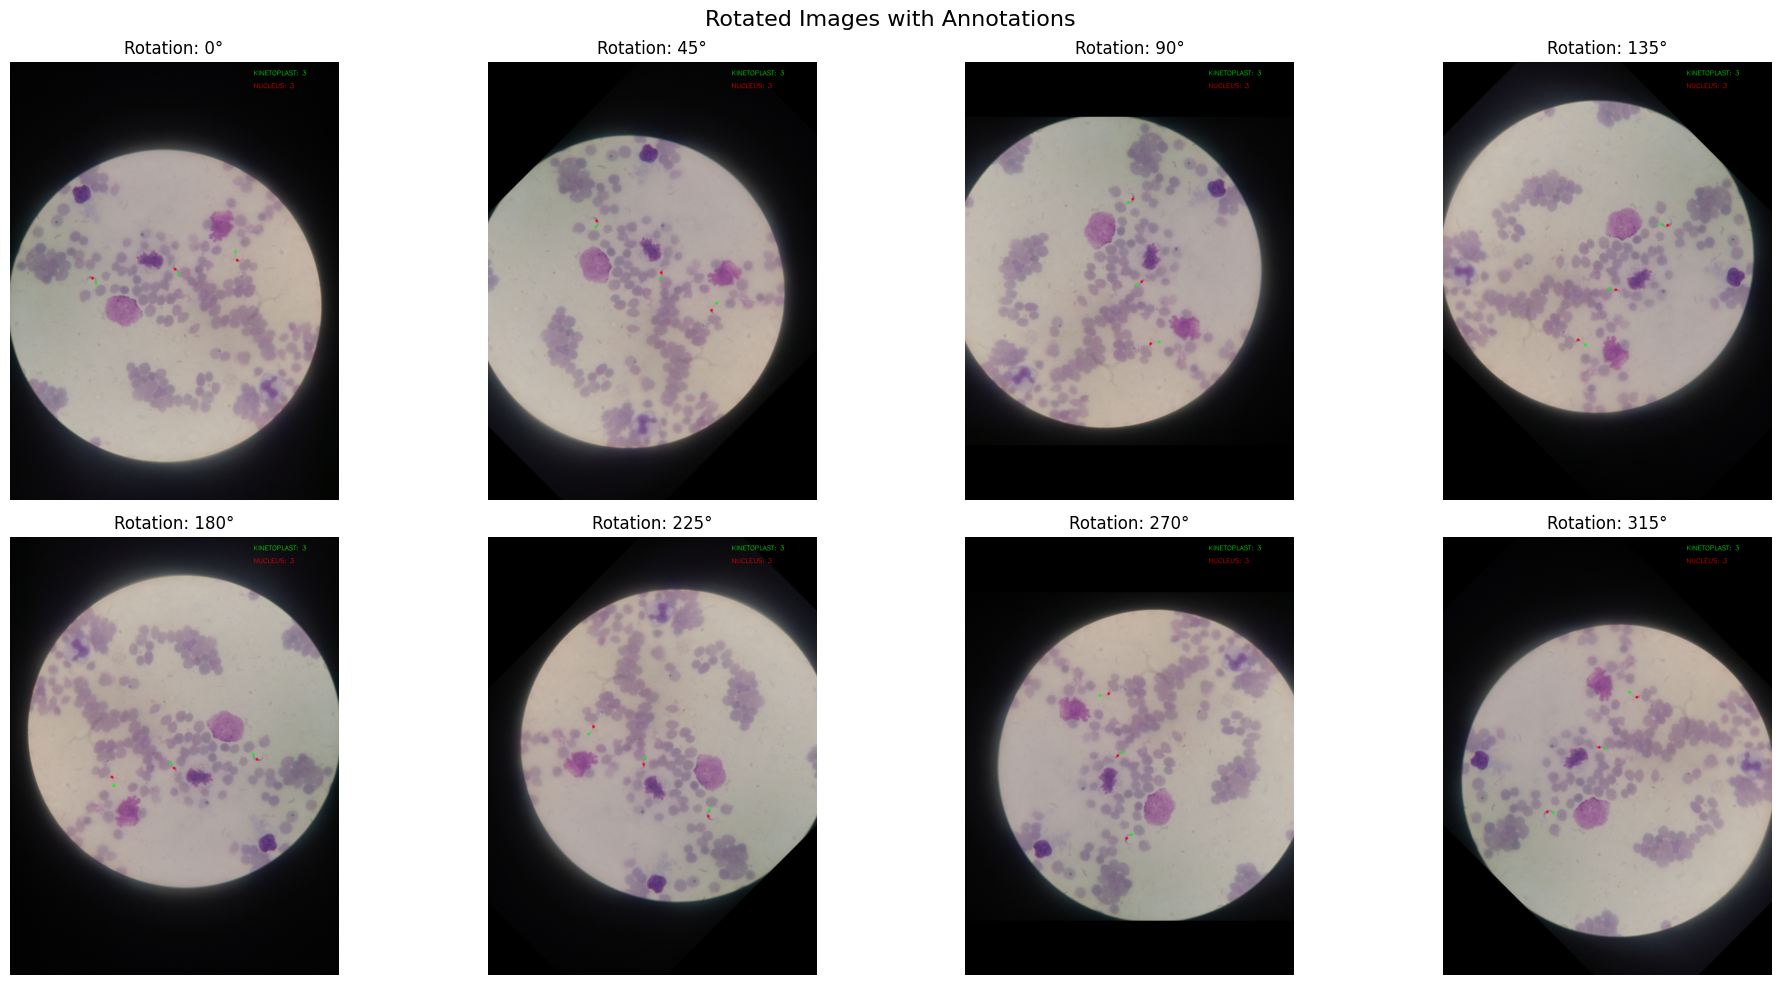

In [10]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# File paths
csv_path = "./ft_orig/supp_data01.csv"
image_path = './img/field0001.jpg'

# Read CSV
df = pd.read_csv(csv_path)

# Check required columns
required_cols = ['filename', 'new_x', 'new_y', 'structure']
if not all(col in df.columns for col in required_cols):
    print("CSV is missing required columns.")
    exit()

# Filter DataFrame for 'field0001.jpg'
df_image = df[df['filename'].str.strip() == 'field0001.jpg']

# Load image
image = cv2.imread(image_path)
if image is None:
    print("Image not found.")
    exit()

# Get original dimensions
original_h, original_w = image.shape[:2]

# Define target size
target_size = (768, 1024)  # width, height

# Resize the image
resized_image = cv2.resize(image, target_size)

# Define a color map for specific structures
color_map = {
    'NUCLEUS': (0, 0, 255),      # Red
    'KINETOPLAST': (0, 255, 0),  # Green
}

# Default color for other structures
default_color = (255, 0, 0)  # Blue

# Count the occurrences of each structure
structure_counts = defaultdict(int)
for _, row in df_image.iterrows():
    structure_counts[row['structure']] += 1

# Function to rotate a point around a center
def rotate_point(point, angle, center):
    angle_rad = np.deg2rad(angle)
    x, y = point
    cx, cy = center
    x_rot = cx + np.cos(angle_rad) * (x - cx) - np.sin(angle_rad) * (y - cy)
    y_rot = cy + np.sin(angle_rad) * (x - cx) + np.cos(angle_rad) * (y - cy)
    return int(x_rot), int(y_rot)

# Create a figure with 8 subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
fig.suptitle('Rotated Images with Annotations', fontsize=16)

# Center of rotation
center = (target_size[0] // 2, target_size[1] // 2)

# Loop through each rotation angle (0°, 45°, 90°, ..., 315°)
for i, angle in enumerate(range(0, 360, 45)):
    # Get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
    
    # Rotate the image
    rotated_image = cv2.warpAffine(resized_image, rotation_matrix, target_size)
    
    # Draw annotations on the rotated image
    if not df_image.empty:
        # Position for the labels in the top-right corner
        label_x = target_size[0] - 200  # X position (adjust as needed)
        label_y = 30  # Initial Y position (adjust as needed)
        
        # Draw the structure counts in the top-right corner
        for structure, count in structure_counts.items():
            # Get the color for the current structure
            color = color_map.get(structure, default_color)  # Use default color if structure not in map
            
            # Draw the label with the count
            label = f"{structure}: {count}"
            cv2.putText(rotated_image, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
            
            # Move the Y position down for the next label
            label_y += 30  # Adjust spacing between labels
        
        # Draw the points on the rotated image
        for index, row in df_image.iterrows():
            x = int(row['new_x'])
            y = int(row['new_y'])
            label = row['structure']
            
            # Get the color for the current structure
            color = color_map.get(label, default_color)  # Use default color if structure not in map
            
            # Rotate the point
            rotated_x, rotated_y = rotate_point((x, y), angle, center)
            
            # Draw the circle (point) on the rotated image
            cv2.circle(rotated_image, (rotated_x, rotated_y), 3, color, -1)
    else:
        print("No annotations found for the image.")
    
    # Convert the image to RGB for displaying with matplotlib
    rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    
    # Plot the rotated image in the corresponding subplot
    ax = axes[i // 4, i % 4]  # Determine the subplot position
    ax.imshow(rotated_image_rgb)
    ax.set_title(f'Rotation: {angle}°')
    ax.axis('off')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

In [ ]:
# mejorado - ROTAMOS 7 ROTACIONES, MAS LA ORIGINAL TENEMOS 8 ROTACIONES DE LA IMAGEN

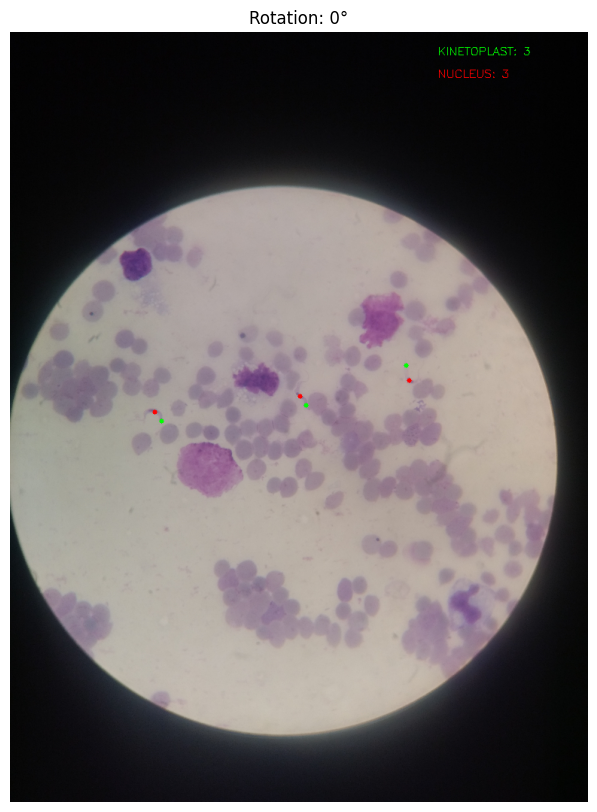

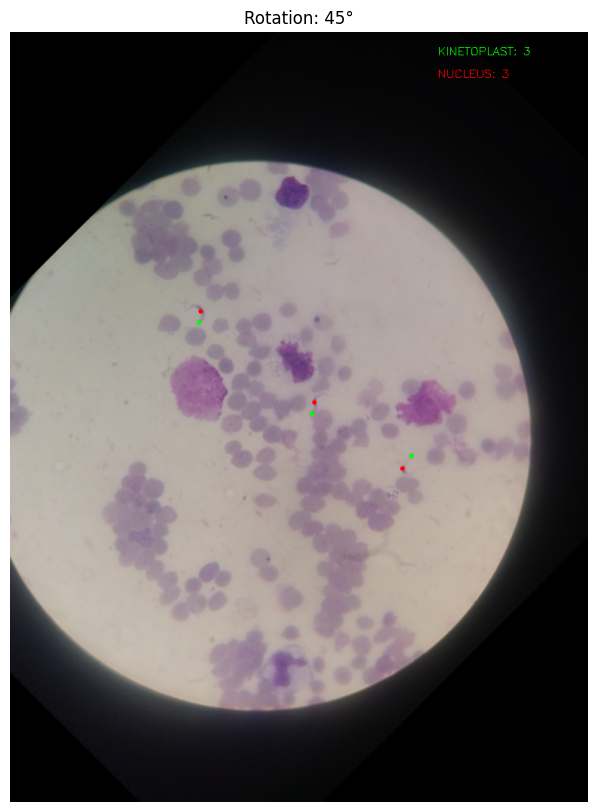

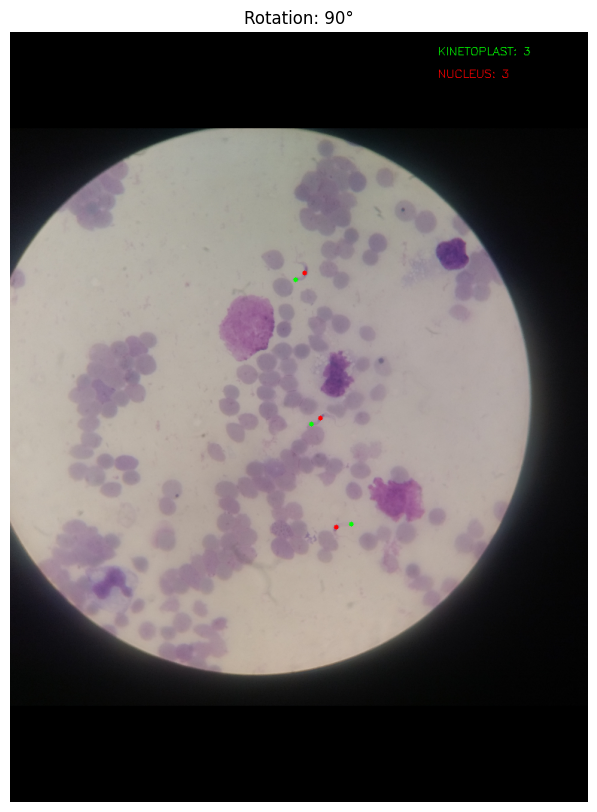

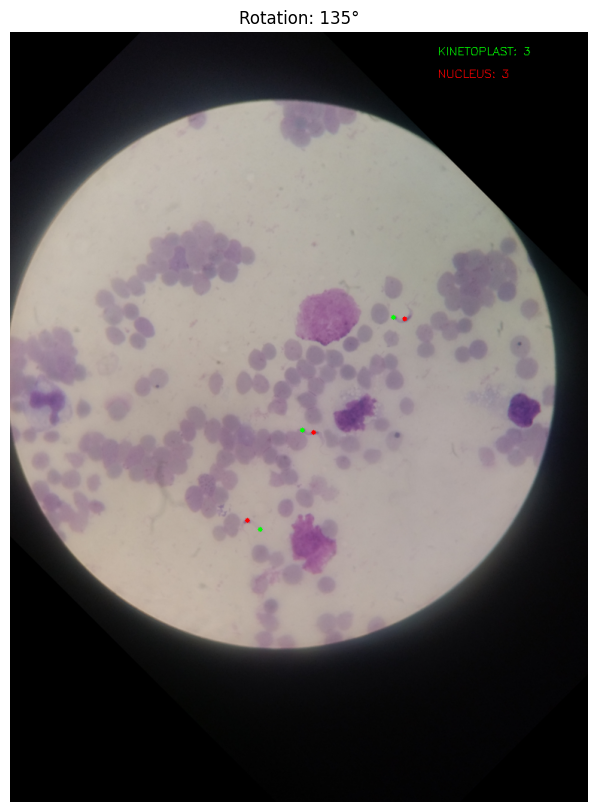

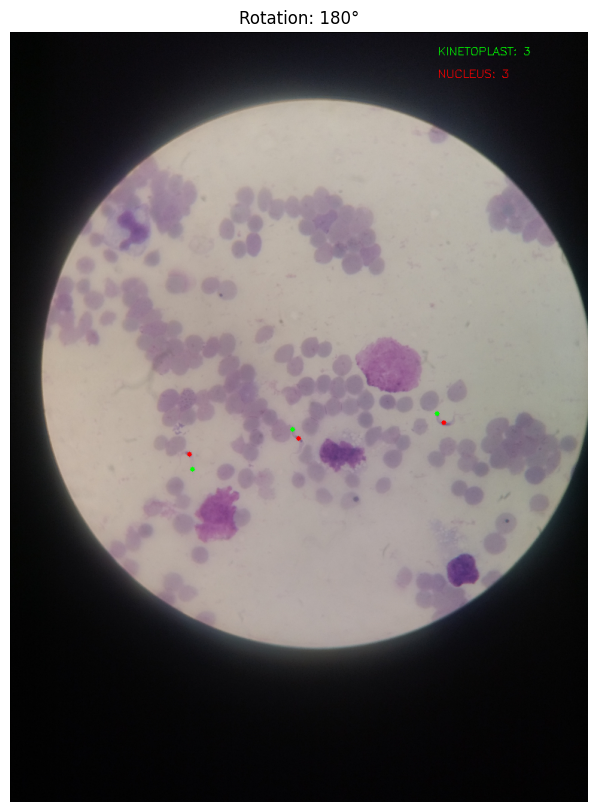

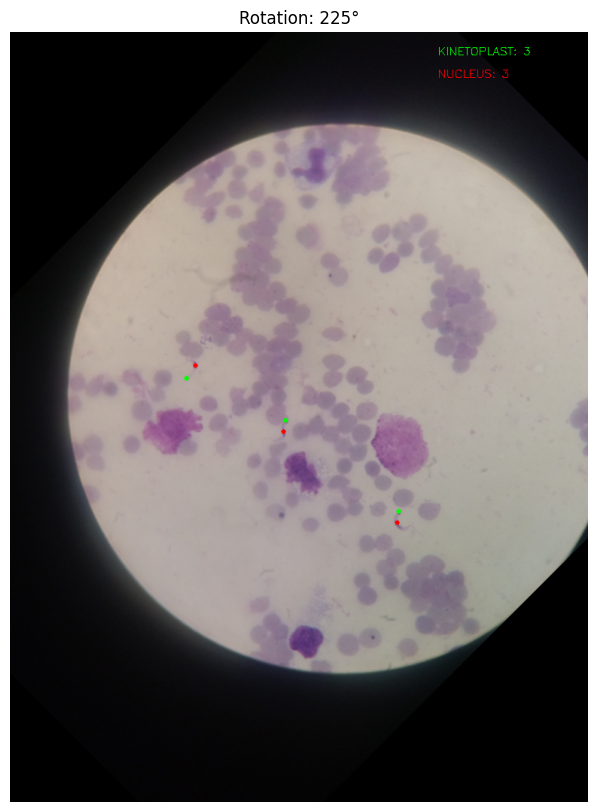

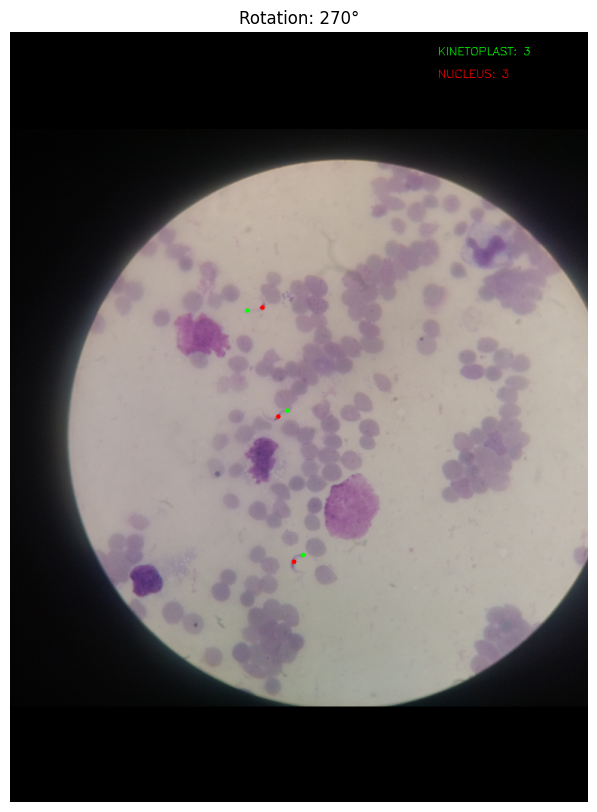

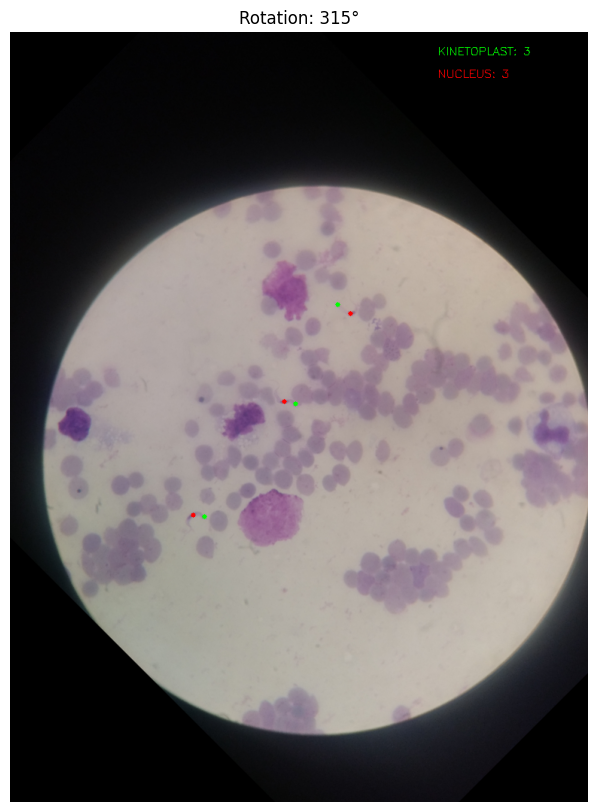

In [11]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# File paths
csv_path = "./ft_orig/supp_data01.csv"
image_path = './img/field0001.jpg'

# Read CSV
df = pd.read_csv(csv_path)

# Check required columns
required_cols = ['filename', 'new_x', 'new_y', 'structure']
if not all(col in df.columns for col in required_cols):
    print("CSV is missing required columns.")
    exit()

# Filter DataFrame for 'field0001.jpg'
df_image = df[df['filename'].str.strip() == 'field0001.jpg']

# Load image
image = cv2.imread(image_path)
if image is None:
    print("Image not found.")
    exit()

# Get original dimensions
original_h, original_w = image.shape[:2]

# Define target size
target_size = (768, 1024)  # width, height

# Resize the image
resized_image = cv2.resize(image, target_size)

# Define a color map for specific structures
color_map = {
    'NUCLEUS': (0, 0, 255),      # Red
    'KINETOPLAST': (0, 255, 0),  # Green
}

# Default color for other structures
default_color = (255, 0, 0)  # Blue

# Count the occurrences of each structure
structure_counts = defaultdict(int)
for _, row in df_image.iterrows():
    structure_counts[row['structure']] += 1

# Function to rotate a point around a center
def rotate_point(point, angle, center):
    angle_rad = np.deg2rad(angle)
    x, y = point
    cx, cy = center
    x_rot = cx + np.cos(angle_rad) * (x - cx) - np.sin(angle_rad) * (y - cy)
    y_rot = cy + np.sin(angle_rad) * (x - cx) + np.cos(angle_rad) * (y - cy)
    return int(x_rot), int(y_rot)

# Center of rotation
center = (target_size[0] // 2, target_size[1] // 2)

# Loop through each rotation angle (0°, 45°, 90°, ..., 315°)
for angle in range(0, 360, 45):
    # Get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
    
    # Rotate the image
    rotated_image = cv2.warpAffine(resized_image, rotation_matrix, target_size)
    
    # Draw annotations on the rotated image
    if not df_image.empty:
        # Position for the labels in the top-right corner
        label_x = target_size[0] - 200  # X position (adjust as needed)
        label_y = 30  # Initial Y position (adjust as needed)
        
        # Draw the structure counts in the top-right corner
        for structure, count in structure_counts.items():
            # Get the color for the current structure
            color = color_map.get(structure, default_color)  # Use default color if structure not in map
            
            # Draw the label with the count
            label = f"{structure}: {count}"
            cv2.putText(rotated_image, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
            
            # Move the Y position down for the next label
            label_y += 30  # Adjust spacing between labels
        
        # Draw the points on the rotated image
        for index, row in df_image.iterrows():
            x = int(row['new_x'])
            y = int(row['new_y'])
            label = row['structure']
            
            # Get the color for the current structure
            color = color_map.get(label, default_color)  # Use default color if structure not in map
            
            # Rotate the point
            rotated_x, rotated_y = rotate_point((x, y), angle, center)
            
            # Draw the circle (point) on the rotated image
            cv2.circle(rotated_image, (rotated_x, rotated_y), 3, color, -1)
    else:
        print("No annotations found for the image.")
    
    # Convert the image to RGB for displaying with matplotlib
    rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    
    # Create a new figure for each rotation
    plt.figure(figsize=(8, 10))  # Adjust figure size as needed
    plt.imshow(rotated_image_rgb)
    plt.title(f'Rotation: {angle}°', fontsize=12)
    plt.axis('off')
    plt.show()  # Show the current figure

In [ ]:
# AUTOMATIZACION GIRAR 560 IMAGENES

# no son 670, hay una imagen dañada, 
# Y 9 imagenes que no contienen anotaciones de NUCLEUS O KINETOPLASTO en el csv

# EL RESULTADO FUE UN CSV DE POSICIONES CON UN TOTAL DE 23849 DATOS

# -Observacion hay numeros impar 
# -hay que revisar si se controla que de pronto haya una anotacion por roi. creo que si.

In [14]:
import pandas as pd
import cv2
import numpy as np
import os
from collections import defaultdict

# File paths
csv_path = "./ft_orig/supp_data01.csv"
image_dir = './img/'  # Directorio donde están las imágenes originales
output_image_dir = './train_augmentation/'  # Carpeta para guardar las imágenes rotadas
output_csv_path = './ft_orig/data_augmentation.csv'  # Ruta del nuevo CSV

# Crear la carpeta de salida si no existe
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)

# Leer el CSV original
df = pd.read_csv(csv_path)

# Verificar columnas requeridas
required_cols = ['filename', 'structure', 'set', 'new_x', 'new_y']
if not all(col in df.columns for col in required_cols):
    print("CSV is missing required columns.")
    exit()

# Filtrar solo las estructuras relevantes (NUCLEUS y KINETOPLAST)
df_filtered = df[df['structure'].isin(['NUCLEUS', 'KINETOPLAST'])]

# Obtener el último número de imagen usado
last_image_number = 704  # Última imagen es field0704.jpg
new_image_number = last_image_number + 1  # Comenzar desde field0705.jpg

# Lista para almacenar las nuevas filas del CSV
new_rows = []

# Función para rotar un punto alrededor de un centro
def rotate_point(point, angle, center):
    angle_rad = np.deg2rad(angle)
    x, y = point
    cx, cy = center
    x_rot = cx + np.cos(angle_rad) * (x - cx) - np.sin(angle_rad) * (y - cy)
    y_rot = cy + np.sin(angle_rad) * (x - cx) + np.cos(angle_rad) * (y - cy)
    return int(x_rot), int(y_rot)

# Procesar cada imagen original
for filename in df_filtered['filename'].unique():
    print(f"\nProcessing original image: {filename}")

    # Cargar la imagen original
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found: {filename}")
        continue

    # Obtener dimensiones originales
    original_h, original_w = image.shape[:2]

    # Definir tamaño objetivo
    target_size = (768, 1024)  # width, height

    # Redimensionar la imagen
    resized_image = cv2.resize(image, target_size)

    # Centro de rotación
    center = (target_size[0] // 2, target_size[1] // 2)

    # Rotar la imagen y las anotaciones en incrementos de 45 grados
    for angle in range(45, 360, 45):
        # Generar el nombre de la nueva imagen
        new_filename = f"field{new_image_number:04d}.jpg"
        new_image_path = os.path.join(output_image_dir, new_filename)

        # Mostrar progreso en consola
        print(f"  Rotating {angle} degrees -> New image: {new_filename}")

        # Obtener la matriz de rotación
        rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)

        # Rotar la imagen
        rotated_image = cv2.warpAffine(resized_image, rotation_matrix, target_size)

        # Guardar la imagen rotada
        cv2.imwrite(new_image_path, rotated_image)

        # Filtrar las anotaciones de la imagen original
        df_image = df_filtered[df_filtered['filename'] == filename]

        # Rotar las anotaciones y agregarlas al nuevo CSV
        for _, row in df_image.iterrows():
            x = int(row['new_x'])
            y = int(row['new_y'])
            structure = row['structure']
            set_value = row['set']

            # Rotar las coordenadas
            rotated_x, rotated_y = rotate_point((x, y), angle, center)

            # Agregar la nueva fila al CSV
            new_rows.append({
                'filename': new_filename,
                'structure': structure,
                'set': set_value,
                'new_x': rotated_x,
                'new_y': rotated_y
            })

            # Mostrar la fila insertada en el CSV
            print(f"    Inserted row: {new_filename}, {structure}, {set_value}, ({rotated_x}, {rotated_y})")

        # Incrementar el contador de imágenes
        new_image_number += 1

# Crear un DataFrame con las nuevas filas
df_augmented = pd.DataFrame(new_rows, columns=required_cols)

# Guardar el nuevo CSV
df_augmented.to_csv(output_csv_path, index=False)

print(f"\nAugmentation complete. Images saved in {output_image_dir}. CSV saved at {output_csv_path}.")
print(f"Total images generated: {new_image_number - 705} (from field0705.jpg to field{new_image_number - 1:04d}.jpg).")


Processing original image: field0001.jpg
  Rotating 45 degrees -> New image: field0705.jpg
    Inserted row: field0705.jpg, KINETOPLAST, train, (251, 386)
    Inserted row: field0705.jpg, NUCLEUS, train, (253, 371)
    Inserted row: field0705.jpg, KINETOPLAST, train, (401, 507)
    Inserted row: field0705.jpg, KINETOPLAST, train, (533, 563)
    Inserted row: field0705.jpg, NUCLEUS, train, (404, 492)
    Inserted row: field0705.jpg, NUCLEUS, train, (521, 580)
  Rotating 90 degrees -> New image: field0706.jpg
    Inserted row: field0706.jpg, KINETOPLAST, train, (379, 329)
    Inserted row: field0706.jpg, NUCLEUS, train, (391, 320)
    Inserted row: field0706.jpg, KINETOPLAST, train, (400, 521)
    Inserted row: field0706.jpg, KINETOPLAST, train, (453, 654)
    Inserted row: field0706.jpg, NUCLEUS, train, (412, 513)
    Inserted row: field0706.jpg, NUCLEUS, train, (433, 658)
  Rotating 135 degrees -> New image: field0707.jpg
    Inserted row: field0707.jpg, KINETOPLAST, train, (509, 379)

In [16]:
import pandas as pd
import os

# File paths
csv_path = "./ft_orig/supp_data01.csv"
image_dir = './img/'  # Carpeta donde están las imágenes

# Leer el CSV original
df = pd.read_csv(csv_path)

# Verificar columnas requeridas
required_cols = ['filename', 'structure', 'set', 'new_x', 'new_y']
if not all(col in df.columns for col in required_cols):
    print("CSV is missing required columns.")
    exit()

# Filtrar solo las estructuras relevantes (NUCLEUS y KINETOPLAST)
df_filtered = df[df['structure'].isin(['NUCLEUS', 'KINETOPLAST'])]

# Obtener la lista de imágenes en la carpeta
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
image_files.sort()  # Ordenar alfabéticamente

# Obtener la lista de imágenes en el CSV
csv_files = df_filtered['filename'].unique()

# Crear conjuntos para facilitar la comparación
set_image_files = set(image_files)  # Imágenes en la carpeta
set_csv_files = set(csv_files)      # Imágenes en el CSV

# Encontrar coincidencias y diferencias
matches = set_image_files.intersection(set_csv_files)  # Imágenes en ambos
missing_in_csv = set_image_files - set_csv_files       # Imágenes en la carpeta pero no en el CSV
missing_in_folder = set_csv_files - set_image_files    # Imágenes en el CSV pero no en la carpeta

# Contar el número de coincidencias y diferencias
num_matches = len(matches)
num_missing_in_csv = len(missing_in_csv)
num_missing_in_folder = len(missing_in_folder)

# Mostrar resultados
print(f"Número de coincidencias (imágenes en la carpeta y en el CSV): {num_matches}")
print(f"Número de imágenes en la carpeta pero no en el CSV: {num_missing_in_csv}")
print(f"Número de imágenes en el CSV pero no en la carpeta: {num_missing_in_folder}")

# Mostrar las imágenes que no coinciden
if num_missing_in_csv > 0:
    print("\nImágenes en la carpeta pero no en el CSV:")
    for filename in sorted(missing_in_csv):
        print(filename)

if num_missing_in_folder > 0:
    print("\nImágenes en el CSV pero no en la carpeta:")
    for filename in sorted(missing_in_folder):
        print(filename)

# Crear un diccionario para almacenar el número de anotaciones por imagen
annotation_counts = {}

# Contar anotaciones para cada imagen en el CSV
for filename in matches:
    count = df_filtered[df_filtered['filename'] == filename].shape[0]  # Contar filas
    annotation_counts[filename] = count

# Separar imágenes con anotaciones y sin anotaciones
images_with_annotations = {k: v for k, v in annotation_counts.items() if v > 0}
images_without_annotations = {k: v for k, v in annotation_counts.items() if v == 0}

# Mostrar resultados
print("\nImágenes con anotaciones:")
for filename, count in images_with_annotations.items():
    print(f"{filename}: {count} anotaciones")

print("\nImágenes sin anotaciones:")
for filename in images_without_annotations.keys():
    print(filename)

# Resumen
total_images = len(annotation_counts)
total_with_annotations = len(images_with_annotations)
total_without_annotations = len(images_without_annotations)

print(f"\nResumen:")
print(f"Total de imágenes en el CSV: {total_images}")
print(f"Imágenes con anotaciones: {total_with_annotations}")
print(f"Imágenes sin anotaciones: {total_without_annotations}")

Número de coincidencias (imágenes en la carpeta y en el CSV): 560
Número de imágenes en la carpeta pero no en el CSV: 9
Número de imágenes en el CSV pero no en la carpeta: 105

Imágenes en la carpeta pero no en el CSV:
field0232.jpg
field0268.jpg
field0272.jpg
field0343.jpg
field0379.jpg
field0389.jpg
field0460.jpg
field0555.jpg
field0570.jpg

Imágenes en el CSV pero no en la carpeta:
field0600.jpg
field0601.jpg
field0602.jpg
field0603.jpg
field0604.jpg
field0605.jpg
field0606.jpg
field0607.jpg
field0608.jpg
field0609.jpg
field0610.jpg
field0611.jpg
field0612.jpg
field0613.jpg
field0614.jpg
field0615.jpg
field0616.jpg
field0617.jpg
field0618.jpg
field0619.jpg
field0620.jpg
field0621.jpg
field0622.jpg
field0623.jpg
field0624.jpg
field0625.jpg
field0626.jpg
field0627.jpg
field0628.jpg
field0629.jpg
field0630.jpg
field0631.jpg
field0632.jpg
field0633.jpg
field0634.jpg
field0635.jpg
field0636.jpg
field0637.jpg
field0638.jpg
field0639.jpg
field0640.jpg
field0641.jpg
field0642.jpg
field0643.

In [1]:
import pandas as pd

# File paths
csv_initial_path = "./ft_orig/supp_data01.csv"  # CSV inicial
csv_augmented_path = './ft_orig/data_augmentation.csv'  # CSV de datos aumentados
csv_final_path = './ft_orig/combined_data.csv'  # Ruta del CSV final combinado

# Leer los CSV
df_initial = pd.read_csv(csv_initial_path)
df_augmented = pd.read_csv(csv_augmented_path)

# Verificar columnas requeridas
required_cols = ['filename', 'structure', 'set', 'new_x', 'new_y']
if not all(col in df_initial.columns for col in required_cols) or not all(col in df_augmented.columns for col in required_cols):
    print("Uno de los CSV no tiene las columnas requeridas.")
    exit()

# Añadir columnas faltantes al CSV de datos aumentados
if 'x' not in df_augmented.columns:
    df_augmented['x'] = 0  # Asignar 0 a la columna 'x'
if 'y' not in df_augmented.columns:
    df_augmented['y'] = 0  # Asignar 0 a la columna 'y'

# Combinar los dos DataFrames
df_combined = pd.concat([df_initial, df_augmented], ignore_index=True)

# Guardar el CSV final combinado
df_combined.to_csv(csv_final_path, index=False)

# Verificar el conteo de filas
initial_rows = df_initial.shape[0]
augmented_rows = df_augmented.shape[0]
combined_rows = df_combined.shape[0]

print(f"Filas en el CSV inicial: {initial_rows}")
print(f"Filas en el CSV de datos aumentados: {augmented_rows}")
print(f"Filas en el CSV final combinado: {combined_rows}")

if combined_rows == (initial_rows + augmented_rows):
    print("El conteo de filas es correcto. Los datos se han combinado correctamente.")
else:
    print("¡Advertencia! El conteo de filas no coincide. Revise los datos.")

Filas en el CSV inicial: 5250
Filas en el CSV de datos aumentados: 23849
Filas en el CSV final combinado: 29099
El conteo de filas es correcto. Los datos se han combinado correctamente.
